# Facial Emotion Recognition using Machine learning.
Starting with connecting our colab file with drive. So, instead of running everything again and again we can continue our work from leaving point


In [ ]:
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


We will be working with kaggle so starting with its installation.

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Creating a kaggle folder so that we can store kaggle json file

In [ ]:
! mkdir ~/.kaggle 

Storing the Kaggle json file

In [ ]:
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


Accessing the kaggle jason file

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


Downloading the dataset "challenges-in-representation-learning-facial-expression-recognition-challenge". This is a zip file.

In [ ]:
! kaggle competitions download -c challenges-in-representation-learning-facial-expression-recognition-challenge

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.8/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.8/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


Finding that where actually the dataset went

In [ ]:
pwd

'/content'

unziping the zip file for further processing
Because it contains icml_face_data.csv 

In [ ]:
! unzip challenges-in-representation-learning-facial-expression-recognition-challenge.zip

unzip:  cannot find or open challenges-in-representation-learning-facial-expression-recognition-challenge.zip, challenges-in-representation-learning-facial-expression-recognition-challenge.zip.zip or challenges-in-representation-learning-facial-expression-recognition-challenge.zip.ZIP.


Importing pandas to read from the icml_face_data.csv file

In [ ]:
import pandas as pd

Reading the file. This file will contain the images on which we will train our model.

In [ ]:
icml_faces = pd.read_csv('/content/mydrive/MyDrive/AI_Project/icml_face_data.csv')

Checking whether we read it correctly of not. So displaying some rows of dataframe.

In [ ]:
icml_faces.head()

,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


Now as our dataset contains pixel values. And as these pixels are numeric. We have to do some preprocessing before passing it to model so importing numpy.

In [ ]:
import numpy as np

As the pictures in datasets are numeric form so we will plot the images using the numpy array which we imported. For this creating a function.

In [ ]:
def plot_images(df, emotion_class):

    emo_df = df[df.emotion==emotion_class]

    row = emo_df.sample(1)

    img = np.fromstring(row[' pixels'].iloc[0], dtype=int, sep=' ')

    img = np.reshape(img, (48, 48))

    image = np.zeros((48,48,3))

    image[:,:,0] = img

    image[:,:,1] = img

    image[:,:,2] = img

    image = np.array(image.astype(np.uint8))

    return image

In [ ]:
import matplotlib.pyplot as plt

Matplotlib is use for plotting purposes. So the function which we defined will be further use for plotting these image and we will show the image with the help of matplotlib. Plotting the someimages to get an idea what kind og images do we have in our dataset.

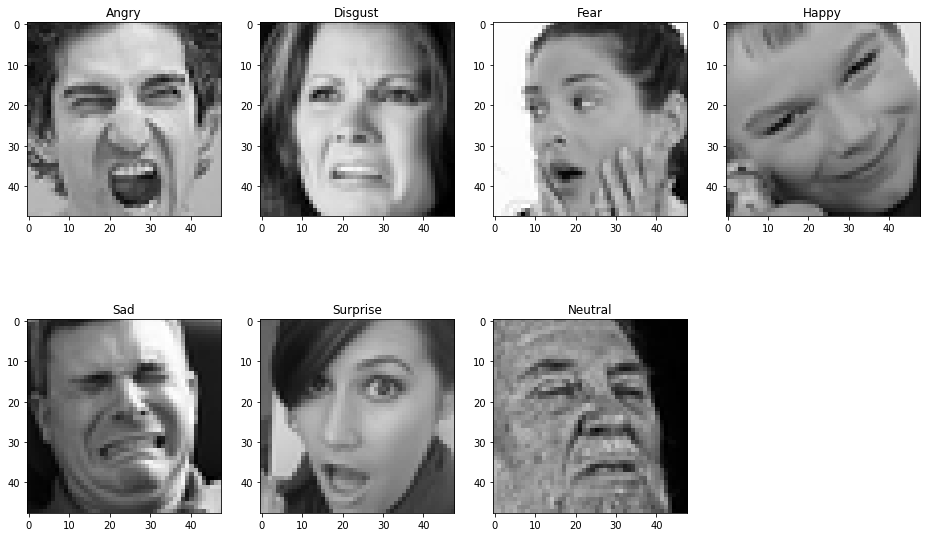

In [ ]:
plt.figure(0, figsize=(16,10))
emotion_num_map=["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
for i in range(7):

    plt.subplot(2,4,i+1)

    image = plot_images(icml_faces,i)

    plt.imshow(image)
  
    plt.title( emotion_num_map[i])




Checking how much images we have corresponding to emotions.

In [ ]:
icml_faces['emotion'].value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

Importing tensorflow and keras for model building.

In [ ]:
import tensorflow as tf
from tensorflow import keras

Now defining a function for preprocessing. It preprocess the data so that data can be pass to model.

In [ ]:
def preprocess(input_data):

    input_images = np.zeros(shape=(input_data.shape[0], 48, 48))

    for i, row in enumerate(input_data.index):

        image = np.fromstring(input_data.loc[row, ' pixels'], dtype=int, sep=' ')

        image = np.reshape(image, (48, 48))

        input_images[i] = image

    input_images = input_images.reshape((input_images.shape[0], 48, 48, 1))

    input_images = input_images.astype('float32')/255

    input_labels = np.array(list(map(int, input_data['emotion'])))

    image_labels = keras.utils.to_categorical(input_labels, 7)

    return  input_images, image_labels

Importing batch normalization was giving us error when importing it from keras so we had to download it from separately.

In [ ]:
!pip install tensorflow.kears.models.BatchNormalization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement tensorflow.kears.models.BatchNormalization (from versions: none)
ERROR: No matching distribution found for tensorflow.kears.models.BatchNormalization


Importing all the layers so that we can build our model.

In [ ]:
import tensorflow as tf
import cv2

from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers  import Dropout

Building a simple CNN model. A simple CNN model consist of many layers. These layers are the combination of convolution and pooling. Using relu and softmax as activation function. And at the end compiling this model on SDG and categoricalcrossentropy loss function.

In [ ]:
model = tf.keras.Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(Flatten()) 
model.add(Dense(64, activation='relu')) 
model.add(Dense(7, activation='softmax'))

model.summary()
model.compile(optimizer='sgd', loss=tf.keras.losses.CategoricalCrossentropy())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 4096)             

Previous model did't gave us that accuracy so we added added a batch normalization layer.

In [ ]:
model =  tf.keras.models.Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))

model.add(BatchNormalization())

model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(BatchNormalization())

model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(BatchNormalization())

model.add(Flatten())

model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))

model.add(Dense(7, activation='softmax'))
model.summary()
model.compile(optimizer='sgd', loss=tf.keras.losses.CategoricalCrossentropy())


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 46, 46, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 21, 21, 64)       256       
 hNormalization)                                                 
                                                      

From Exploring the data, in data we have a column called "usage". So from the file 28709 is the row where training data changed to testing so splitting these two. 

In [ ]:
training=icml_faces[:28709]
testing=icml_faces[28709:]
print(training)
print(testing)

       emotion     Usage                                             pixels
0            0  Training  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1            0  Training  151 150 147 155 148 133 111 140 170 174 182 15...
2            2  Training  231 212 156 164 174 138 161 173 182 200 106 38...
3            4  Training  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4            6  Training  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
...        ...       ...                                                ...
28704        2  Training  84 85 85 85 85 85 85 85 86 86 86 87 86 86 91 9...
28705        0  Training  114 112 113 113 111 111 112 113 115 113 114 11...
28706        4  Training  74 81 87 89 95 100 98 93 105 120 127 133 146 1...
28707        0  Training  222 227 203 90 86 90 84 77 94 87 99 119 134 14...
28708        4  Training  195 199 205 206 205 203 206 209 208 210 212 21...

[28709 rows x 3 columns]
       emotion        Usage                                   

Doing preprocessing we that we can pass it to our model

In [ ]:
X_train,y_train=preprocess(training)

Printing the model summary so that we can see that we are picking the right model.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 46, 46, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 21, 21, 64)       256       
 hNormalization)                                                 
                                                        

Now starting traning our model. We set parameters on hit and trial method.

In [ ]:
X_test,y_test=preprocess(testing)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=50, batch_size=128)

Epoch 1/50
225/225 [==============================] - 129s 568ms/step - loss: 1.9785 - val_loss: 1.8891
Epoch 2/50
225/225 [==============================] - ETA: 0s - loss: 1.6728

KeyboardInterrupt: ignored

Again training model with different parameters to see whether accuracy increased or decreased. 

In [ ]:
X_test,y_test=preprocess(testing)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=100, batch_size=64)


Epoch 1/100
449/449 [==============================] - 131s 290ms/step - loss: 1.8923 - val_loss: 1.6907
Epoch 2/100
449/449 [==============================] - 130s 290ms/step - loss: 1.5881 - val_loss: 1.6854
Epoch 3/100
449/449 [==============================] - 130s 290ms/step - loss: 1.4610 - val_loss: 1.4703
Epoch 4/100
449/449 [==============================] - 132s 295ms/step - loss: 1.3889 - val_loss: 1.3702
Epoch 5/100
449/449 [==============================] - 137s 306ms/step - loss: 1.3345 - val_loss: 1.3215
Epoch 6/100
449/449 [==============================] - 131s 292ms/step - loss: 1.2837 - val_loss: 1.4623
Epoch 7/100
449/449 [==============================] - 131s 293ms/step - loss: 1.2435 - val_loss: 1.6230
Epoch 8/100
449/449 [==============================] - 131s 291ms/step - loss: 1.2098 - val_loss: 1.3098
Epoch 9/100
449/449 [==============================] - 132s 294ms/step - loss: 1.1762 - val_loss: 1.2586
Epoch 10/100
449/449 [==============================] -

ls command for same as cmd.

In [ ]:
ls

challenges-in-representation-learning-facial-expression-recognition-challenge.zip
example_submission.csv
fer2013.tar.gz
icml_face_data.csv
improve_model1.h5
kaggle.json
mydrive/
sample_data/
test.csv
train.csv


Checking where we stand.

In [ ]:
!pwd

/content


Changing our this on drive so:

In [ ]:
%cd MyDrive/AI_Project

[Errno 2] No such file or directory: 'MyDrive/AI_Project'
/content


Saving weights so that we dont have to spend 5 hours on training again.

In [ ]:
#model.save("cnn_model")
#model.save("80peraccuracy.h5")

Now loading those weights. So that we can we can continue from here :)

In [ ]:
model.load_weights("/content/mydrive/MyDrive/AI_Project/80peraccuracy.h5")

After loading we again compile it otherwise we get an error

In [ ]:
model.compile(optimizer='sgd', loss=tf.keras.losses.CategoricalCrossentropy())

Now comes the testing phase. Testing is from train, because we don't have labels in test.

In [ ]:
test_data = pd.read_csv('/content/mydrive/MyDrive/AI_Project/train.csv')

ipreprocess for its preprocessing. Printing of things after this cell is just some docs and nothing else.

In [ ]:
def ipreprocess(input_data):

    input_images = np.zeros(shape=(input_data.shape[0], 48, 48))

    for i, row in enumerate(input_data.index):

        image = np.fromstring(input_data.loc[row, 'pixels'], dtype=int, sep=' ')

        image = np.reshape(image, (48, 48))

        input_images[i] = image

    input_images = input_images.reshape((input_images.shape[0], 48, 48, 1))

    input_images = input_images.astype('float32')/255

    input_labels = np.array(list(map(int, input_data['emotion'])))

    image_labels = tf.keras.utils.to_categorical(input_labels, 7)

    return  input_images, image_labels

test_data = pd.read_csv('/content/mydrive/MyDrive/AI_Project/train.csv')
a= ipreprocess(test_data)
'''
img = np.reshape(a[0], (48, 48))
#print(img,"image ")

image = np.zeros((48,48,3))
image[:,:,0] = img
#print(image,'image 1')

image[:,:,1] = img
#print(image,'image 2')

image[:,:,2] = img
#print(image,'image 3')

image = np.array(image.astype(np.uint8))

plt.figure(0, figsize=(16,10))
plt.imshow(image)

# from keras.models import load_model
# saved_model = load_model("model.h5")
# output = saved_model.predict(img)
# print(output)
'''

'\nimg = np.reshape(a[0], (48, 48))\n#print(img,"image ")\n\nimage = np.zeros((48,48,3))\nimage[:,:,0] = img\n#print(image,\'image 1\')\n\nimage[:,:,1] = img\n#print(image,\'image 2\')\n\nimage[:,:,2] = img\n#print(image,\'image 3\')\n\nimage = np.array(image.astype(np.uint8))\n\nplt.figure(0, figsize=(16,10))\nplt.imshow(image)\n\n# from keras.models import load_model\n# saved_model = load_model("model.h5")\n# output = saved_model.predict(img)\n# print(output)\n'

This is for getting the image for testing. It first make image capable for passing if in the model. Now we cannot pass this image in ipreprocess beacouse this function is for datasets and not for single image. Also displaying the image that what are we getting.

      emotion                                             pixels
9921        3  234 228 223 215 178 165 153 174 166 142 133 14...
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]
[234 228 223 ...  14  27  27]
[[234 228 223 ... 255 255 255]
 [214 209 206 ... 255 255 255]
 [198 197 209 ... 255 255 255]
 ...
 [ 44  44  43 ...  15  27  28]
 [ 42  43  41 ...  14  28  28]
 [ 40  41  38 ...  14  27  27]]
[234 228 223 ...  14  27  27]


Text(0.5, 1.0, 'Happy')

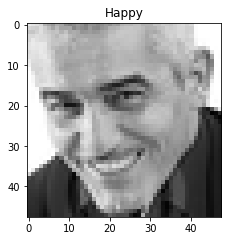

In [ ]:
plt.figure(0, figsize=(16,10))
emotion_num_map=["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
i=3
plt.subplot(2,4,i+1)
df=test_data
emo_df = df[df.emotion==i]
#print(emotion_class,"emotion_class")
#print(emotion_class,"emotion_class")
#print(emo_df,"emo_df")

row = emo_df.sample()
#print(row)
#
print(row)
input_images = np.zeros(shape=(1, 48, 48))
print(input_images)
image = np.fromstring(row['pixels'].iloc[0], dtype=int, sep=' ')
print(image)
image = np.reshape(image, (48, 48))
print (image)

input_images[0] = image

input_images = input_images.reshape((input_images.shape[0], 48, 48, 1))

input_images = input_images.astype('float32')/255

input_labels = i
#print(input_images)

#for plotting of things

img = np.fromstring(row['pixels'].iloc[0], dtype=int, sep=' ')
print(img)

test_image = np.reshape(img, (48, 48,1))

img = np.reshape(img, (48, 48))
#print(img,"image ")

image = np.zeros((48,48,3))

image[:,:,0] = img
#print(image,'image 1')

image[:,:,1] = img
#print(image,'image 2')

image[:,:,2] = img
#print(image,'image 3')

image = np.array(image.astype(np.uint8))

plt.imshow(image)

plt.title( emotion_num_map[i])

Passing the previous image in the prediction to check wheter it is true or not

In [ ]:
test_the_image = model.predict(input_images)

1/1 [==============================] - 1s 607ms/step


From following we can see that index of happy have the highest value so out model predicted it right.

In [ ]:
print(test_the_image)

[[1.5880559e-03 3.0254338e-07 2.7921051e-04 9.9801314e-01 5.8301921e-05
  1.2404131e-05 4.8689115e-05]]


Now checking its accuracy we use evaluation function

In [ ]:
test_data = pd.read_csv('/content/mydrive/MyDrive/AI_Project/train.csv')
X,Y=ipreprocess(test_data)
output=model.evaluate(X, Y, verbose = 0)

Printing accuracy. It will be multiply by 100 to get the percentage.

In [ ]:
print(output)

0.8052910566329956


# Now this is for Runtime detection

In [ ]:
#initializing 
import cv2
import joblib
from numpy import asarray
import numpy as np
from PIL import Image
import pandas as pd
import openpyxl

Setting open cv library. and for accessing the camera.

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

detection of faces and some other helping functions.

In [ ]:
face_detector = cv2.CascadeClassifier('/content/mydrive/MyDrive/AI_Project/haarcascade_frontalface_default.xml')
def extract_faces(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_points = face_detector.detectMultiScale(gray, 1.3, 5)
    return face_points


def identify_face(facearray):
    model = joblib.load('/content/mydrive/MyDrive/AI_Project/face_recognition_model.pkl')
    return model.predict(facearray)

This code is for pycharm. it will not run on colab. But this is for image capturing.

In [ ]:
vc = cv2.VideoCapture(0)
while vc.isOpened():
    ret, frame = vc.read()
    cv2.imshow("set for a pic",frame)
    if cv2.waitKey(1) == 27:
        faces = extract_faces(frame)
        print(faces)
        if faces != ():
            for (x, y, w, h) in faces:
                name = '/content/mydrive/MyDrive/AI_Project/pic.jpg'
                cv2.imwrite(name, frame[y:y + h, x:x + w])
        vc.release()
        cv2.destroyAllWindows()
        break

Accessing webcam and capturing picture.

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  
  # Show the image which was just taken.
  display(Image(filename))
  
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

Checking whether we have face in our captured image or not. If not then it will notify you and if detected it will output dimensions and we can run futher cells. Here we can also add existing image. Just change the image name. **NOTE:** Image should be in "**JPG**" format

In [ ]:
image_name="/content/photo.jpg"
frame=cv2.imread(image_name)
faces = extract_faces(frame)
print(faces)
if faces==():
  print("No face detected in the image, don't run further cells")
else:
  for (x, y, w, h) in faces:
      print("run other cells and these are the faces dimensions")
      name = '/content/mydrive/MyDrive/AI_Project/pic.jpg'
      cv2.imwrite(name, frame[y:y + h, x:x + w])

[[ 88  82 255 255]]
run other cells and these are the faces dimensions


<ipython-input-105-e7110a9e9dfa>:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if faces==():


Now as the face is detected lets do some preprocessing from on the image and then we will predict the expression. It prints the image shape and image_pixels.

In [ ]:
img = cv2.imread("/content/mydrive/MyDrive/AI_Project/pic.jpg")
img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#reshape the grayscale
b=cv2.resize(img,(48,48))
print(b.shape)

#doing preprocessing
input_images = np.zeros(shape=(1, 48, 48))
input_images[0] = b
input_images = input_images.reshape((input_images.shape[0], 48, 48, 1))
input_images = input_images.astype('float32')/255
print(input_images)

(48, 48)
[[[[0.3882353 ]
   [0.4       ]
   [0.40784314]
   ...
   [0.6       ]
   [0.6156863 ]
   [0.6156863 ]]

  [[0.4117647 ]
   [0.4       ]
   [0.39607844]
   ...
   [0.59607846]
   [0.6117647 ]
   [0.6156863 ]]

  [[0.41568628]
   [0.42352942]
   [0.4       ]
   ...
   [0.5411765 ]
   [0.5921569 ]
   [0.62352943]]

  ...

  [[0.60784316]
   [0.6431373 ]
   [0.59607846]
   ...
   [0.5411765 ]
   [0.61960787]
   [0.6156863 ]]

  [[0.6627451 ]
   [0.61960787]
   [0.58431375]
   ...
   [0.5176471 ]
   [0.6039216 ]
   [0.627451  ]]

  [[0.59607846]
   [0.5254902 ]
   [0.49019608]
   ...
   [0.5137255 ]
   [0.58431375]
   [0.60784316]]]]


Now predicting the expression.

In [ ]:
test_the_image = model.predict(input_images)

1/1 [==============================] - 0s 25ms/step


Checking what we get in our input.

In [ ]:
print(test_the_image)

[[4.0897001e-03 7.9754709e-06 5.7813007e-04 4.2412850e-01 4.4096303e-03
  2.3075886e-04 5.6655538e-01]]


Now the above input is a little tricky and calculating, Lets easy things using numpy. And instead of printing whole list of calculation why not just print the maximum expression. So simplifing things. :)

In [ ]:
index_of_expression=np.where(test_the_image[0] == np.max(test_the_image[0]))
emotion_num_map=["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
print(emotion_num_map[index_of_expression[0][0]])

Neutral
